In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten

In [87]:
train = pd.read_csv('/kaggle/input/numbers/mnist_train.csv', header=None)
test=pd.read_csv('/kaggle/input/numbers/mnist_test.csv',header=None)

Y_train=np.array(train.iloc[:,0])
X_train=np.array(train.iloc[:,1:])

Y_test=np.array(test.iloc[:,0])
X_test=np.array(test.iloc[:,1:])

In [88]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)
# print(X_train[0])

Shape of X_train:  (60000, 784)
Shape of Y_train:  (60000,)
Shape of X_test:  (10000, 784)
Shape of Y_test:  (10000,)


In [89]:
X_train=X_train.reshape(len(X_train),28,28,1)
Y_train=Y_train.reshape(len(Y_train),1)

X_test=X_test.reshape(len(X_test,),28,28,1)
Y_test=Y_test.reshape(len(Y_test),1)

X_train=X_train/255.0
X_test=X_test/255.0


In [90]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)


Shape of X_train:  (60000, 28, 28, 1)
Shape of Y_train:  (60000, 1)
Shape of X_test:  (10000, 28, 28, 1)
Shape of Y_test:  (10000, 1)


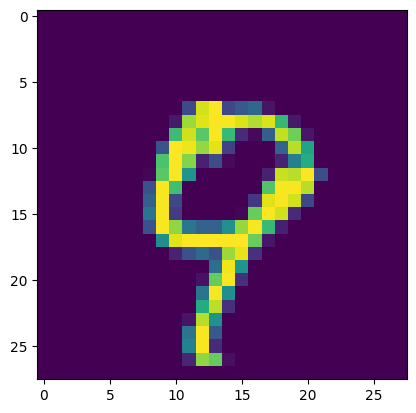

In [94]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx])
plt.show()

In [96]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1),),
    MaxPooling2D((2,2)),
    
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

In [98]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [99]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.8952 - loss: 0.3521
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9840 - loss: 0.0505
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9890 - loss: 0.0334
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9928 - loss: 0.0238
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9941 - loss: 0.0179


In [100]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9865 - loss: 0.0391


[0.031153421849012375, 0.989799976348877]

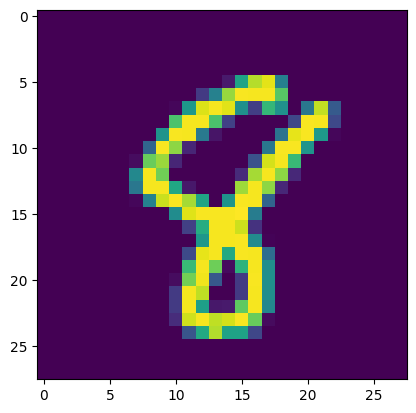

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[1.13434666e-13 4.27946532e-11 8.12037193e-09 1.21431711e-07
  2.25139711e-08 7.40598960e-09 9.60335839e-11 1.31490624e-10
  9.99997258e-01 2.61307650e-06]]
8


In [107]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,28,28, 1))
# y_pred = y_pred > 0.5
predicted_class = np.argmax(y_pred)
print(y_pred)
print(predicted_class)